In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import requests

C:\Users\drake\AppData\Local\Temp\ipykernel_20764\1224789264.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
file_path = 'Fish.csv'
fish_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(fish_data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [4]:
# Check for missing values
missing_values = fish_data.isnull().sum()
print("Missing Values:\n", missing_values)

summary_statistics = fish_data.describe()
print("Summary Statistics:\n", summary_statistics)

Missing Values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Summary Statistics:
             Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

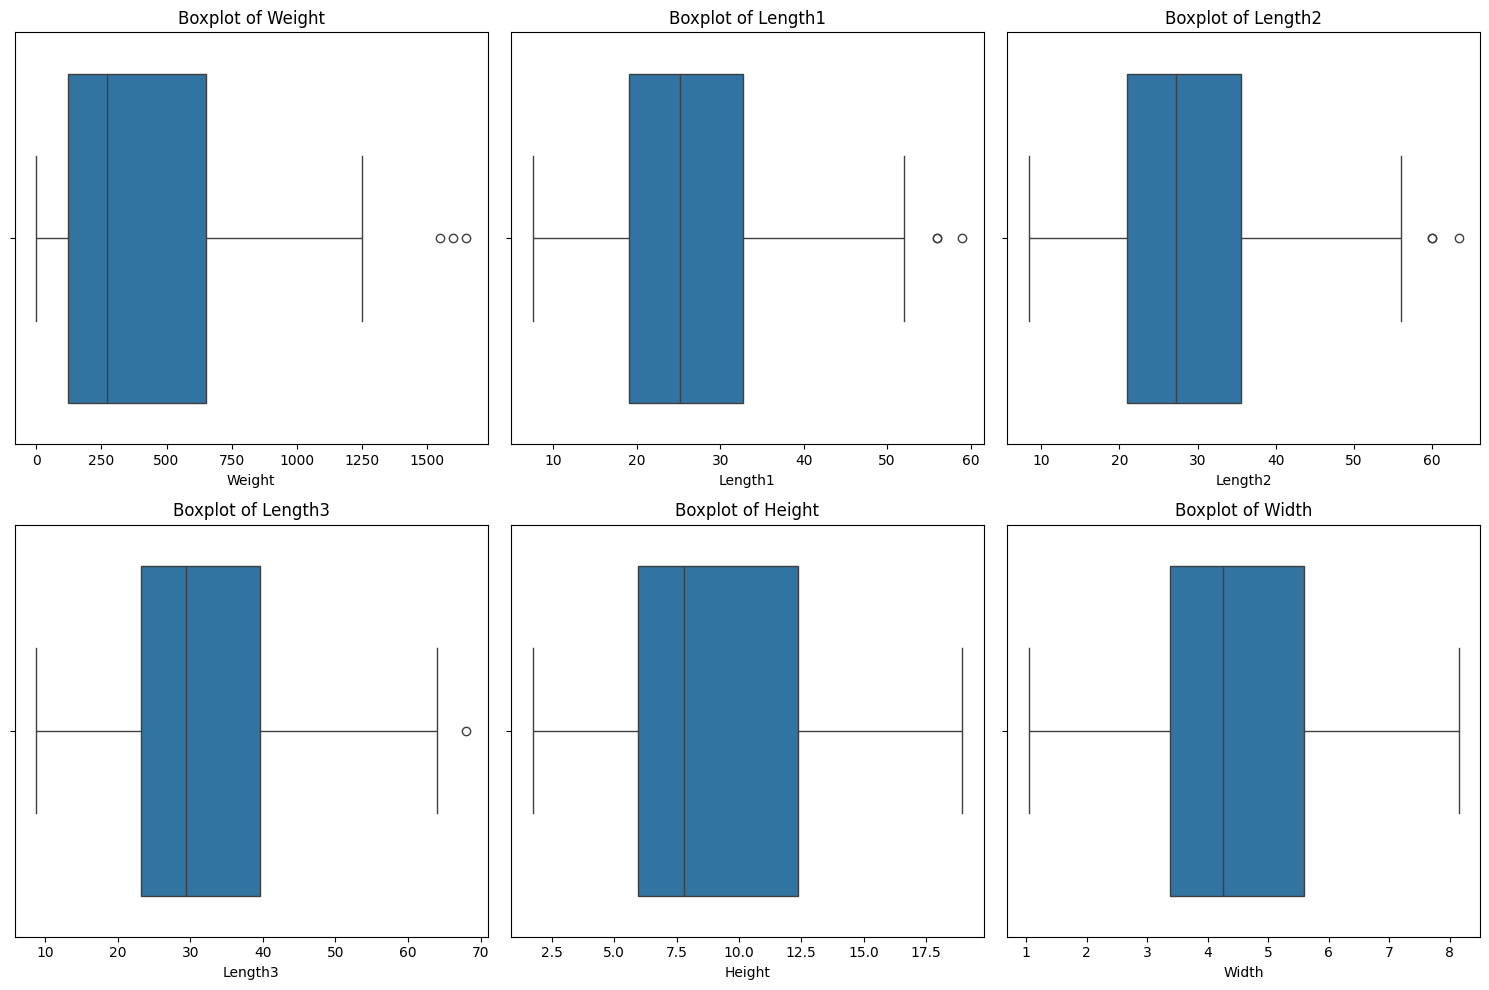

In [5]:
# Set up the matplotlib figure for boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(fish_data.columns[1:], 1):  # Exclude 'Species' which is a categorical feature
    plt.subplot(2, 3, i)
    sns.boxplot(x=fish_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [6]:
# Remove entries with Weight equal to zero
fish_data_cleaned = fish_data[fish_data['Weight'] > 0]

In [7]:
# Encode the 'Species' column
label_encoder = LabelEncoder()
fish_data_cleaned['Species'] = label_encoder.fit_transform(fish_data_cleaned['Species'])


C:\Users\drake\AppData\Local\Temp\ipykernel_20764\4006841169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_data_cleaned['Species'] = label_encoder.fit_transform(fish_data_cleaned['Species'])


Testing Flask API

In [8]:
# Define numerical features (excluding 'Species')
numerical_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [9]:
# Scale numerical features
scaler = StandardScaler()
fish_data_cleaned[numerical_features] = scaler.fit_transform(fish_data_cleaned[numerical_features])


C:\Users\drake\AppData\Local\Temp\ipykernel_20764\1786993642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_data_cleaned[numerical_features] = scaler.fit_transform(fish_data_cleaned[numerical_features])


In [10]:
# Display the cleaned data
print(fish_data_cleaned.head())

   Species  Weight   Length1   Length2   Length3    Height     Width
0        0   242.0 -0.309933 -0.286587 -0.110466  0.591654 -0.240092
1        0   290.0 -0.229770 -0.202457 -0.006935  0.815870 -0.070461
2        0   340.0 -0.239791 -0.183761 -0.015562  0.792000  0.161475
3        0   363.0  0.000698  0.049934  0.191499  0.874260  0.018572
4        0   430.0  0.020738  0.049934  0.234637  0.807462  0.421564


In [11]:
# Separate features and target variable
X = fish_data_cleaned.drop('Weight', axis=1)
y = fish_data_cleaned['Weight']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(126, 6) (32, 6) (126,) (32,)


In [13]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [14]:
# Evaluate the Random Forest Regressor
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')
joblib.dump(rf_regressor, 'random_forest_regressor.pkl')

Random Forest RMSE: 74.93828482716165


c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['random_forest_regressor.pkl']

In [15]:
# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

In [16]:
# Evaluate the Gradient Boosting Regressor
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f'Gradient Boosting RMSE: {rmse_gb}')
joblib.dump(gb_regressor, 'gradient_boosting_regressor.pkl')

Gradient Boosting RMSE: 80.252556006765


c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['gradient_boosting_regressor.pkl']

In [17]:
# Additional evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [18]:
# Display the evaluation results
evaluation_results = {
    'Model': ['Random Forest Regressor', 'Gradient Boosting Regressor'],
    'RMSE': [rmse_rf, rmse_gb],
    'MAE': [mae_rf, mae_gb],
    'R²': [r2_rf, r2_gb]
}
evaluation_results_df = pd.DataFrame(evaluation_results)
print(evaluation_results_df)

                         Model       RMSE        MAE        R²
0      Random Forest Regressor  74.938285  46.375323  0.958167
1  Gradient Boosting Regressor  80.252556  48.061357  0.952023


In [ ]:
# Example request to the deployed model
url = 'http://127.0.0.1:5000/predict'
data = {
    'features': [0, -0.309933, -0.286587, -0.110466, 0.591654, -0.240092]
}
response = requests.post(url, json=data)
print(response.json())